# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D ,Dense

from keras.models import Sequential, Model
import IPython.display as ipd
import resampy
import glob

In [2]:
librosa.version.version

'0.10.1'

# Setting labels

In [2]:
MALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males"
FEMALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\females"

In [3]:
male_list = glob.glob(MALE_DATA + "\\*.wav")
female_list = glob.glob(FEMALE_DATA + "\\*.wav")

In [4]:
# merge male_list and female_list
mylist = male_list.copy()
mylist.extend(female_list)


In [42]:
print(male_list[100])
print(female_list[100])

D:\VoiceClone\OtherProject\VoxCeleb_gender\males\1088.wav
D:\VoiceClone\OtherProject\VoxCeleb_gender\females\1088.wav


In [5]:
gender_list = []
for item in male_list:
    gender_list.append("male")
for item in female_list:
    gender_list.append("female")

In [70]:
gender_list[:5]

['male', 'male', 'male', 'male', 'male']

In [123]:
df =pd.DataFrame(columns=['feature'])
bookmark = 0

X, sr = librosa.load(mylist[0], res_type='kaiser_best', duration=4, sr=22050)
mfccs = np.array(librosa.feature.mfcc(y=X,
                                        sr=sr,
                                        n_mfcc=13))
mfccs.reshape(1,-1)
print(mfccs)
features = np.append(mfccs, labels[0][0])
df.loc[bookmark] = [features]
bookmark=bookmark+1
df

2048
4.5351473922902495e-05
[[-4.2792520e+02 -4.2843097e+02 -4.5260669e+02 ... -3.1384698e+02
  -3.4687927e+02 -4.2193903e+02]
 [ 2.4830859e+02  2.3914746e+02  2.0852216e+02 ...  1.6687225e+02
   1.6663452e+02  1.5293405e+02]
 [ 7.2144175e+00  7.0431032e+00  6.1791501e+00 ... -3.6951843e+01
  -2.4232527e+01  3.5014153e-02]
 ...
 [ 4.8109303e+00  8.6914444e+00  1.0802334e+01 ... -1.0868717e+01
  -1.3075742e+01 -6.0391226e+00]
 [ 6.7184216e-01 -1.6862295e+00  4.1999400e-01 ... -9.7560349e+00
  -6.6497116e+00  9.5027059e-02]
 [-3.2485480e+00 -3.0521395e+00  1.8723817e+00 ...  5.1276627e+00
   4.6511145e+00  5.8589554e+00]]


,feature
0,"[-427.9252, -428.43097, -452.6067, -431.15625,..."


# Getting the features of audio files using librosa

In [ ]:
df =pd.DataFrame(columns=['feature'])
bookmark = 0

for index, y in enumerate(mylist):
    # Test with 10 files
    # if index > 15: break

    print(f"Index: {index}, {bookmark}")

    # Check that if audio file have length more than 4 seconds, if not skip it
    X, sr = librosa.load(y, res_type='kaiser_best', sr=22050)
    if librosa.get_duration(y=X, sr=sr) < 4.0:
        # Audio is too short
        continue
    X, sr = librosa.load(y, res_type='kaiser_best', duration=4, sr=22050)

    # Load mfcc feature
    mfcc = np.array(librosa.feature.mfcc(y=X,
                                sr=sr,
                                n_mfcc=13))
    
    # Add mfcc feature to dataframe
    mfcc.reshape(1,-1)
    features = np.append(mfcc, gender_list[index])
    df.loc[index] = [features]
    bookmark=bookmark+1

In [18]:
df3 = pd.DataFrame(df['feature'].values.tolist())
# df = pd.concat([df3,labels], axis=1)
# newdf = df.rename(index=str, columns={"0": "label"})
df3[:10]
# newdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249
0,-427.9252,-428.43097,-452.6067,-431.15625,-407.09894,-407.0681,-408.1468,-404.64413,-396.83224,-386.99197,...,8.327562,15.9897375,17.597507,17.692066,3.6333556,3.70084,5.1276627,4.6511145,5.8589554,male
1,-291.90793,-281.86307,-284.71735,-295.17624,-343.0302,-380.0261,-384.18854,-386.27927,-392.20465,-402.82428,...,1.0286429,4.791923,1.4955044,2.9875367,-4.360323,-3.9820313,-0.7522369,0.60722303,6.2737617,male
2,-295.48044,-292.99646,-319.61115,-345.10165,-360.0805,-359.2924,-370.20282,-366.50098,-342.81915,-350.91083,...,-6.874013,2.7612538,9.1765995,3.480167,-1.3333678,-4.9539533,-3.695194,-11.875008,-12.289976,male
3,-195.20003,-154.70583,-151.11572,-140.39046,-130.60587,-142.68532,-164.04018,-200.10974,-240.1564,-220.29807,...,-4.9655037,-12.93939,-16.764181,-16.559011,-16.205196,-11.557612,-6.8940406,-2.4631596,-2.31865,male
4,-236.48004,-212.98773,-203.99223,-198.19171,-181.67471,-174.1948,-174.4049,-174.95772,-193.10005,-202.97707,...,6.597538,9.541938,3.7397075,-0.14778233,4.688462,13.125875,9.985416,6.9251366,4.0172257,male
5,-364.2332,-331.15363,-330.07602,-337.9685,-341.50262,-340.276,-341.39114,-341.36493,-340.76492,-345.5038,...,9.272965,4.233175,-0.26729456,5.214996,9.971922,8.332963,13.308153,18.102142,12.081644,male
6,-468.68732,-439.567,-433.22232,-429.3576,-420.15866,-429.03372,-429.35397,-425.36884,-427.56152,-415.3791,...,13.193271,13.647805,8.452859,3.383392,8.33596,8.938852,1.724901,-7.5337887,-11.060463,male
7,-431.497,-401.05017,-356.84512,-283.01212,-239.87527,-233.44756,-232.06291,-240.0779,-244.48027,-234.12129,...,-4.232649,5.829004,13.796534,8.55582,9.511995,24.124283,21.316845,5.471052,-1.2121011,male
8,-237.04472,-170.86577,-137.89635,-127.547035,-138.38306,-157.37444,-141.89882,-153.03378,-212.00381,-269.2359,...,10.610033,7.989786,-3.9271054,4.3780975,15.464066,19.775843,13.489844,13.059154,9.525121,male
9,-353.8086,-340.8646,-372.85898,-371.67117,-351.23557,-321.24258,-281.05923,-262.13425,-253.49765,-273.98996,...,-3.6991196,-12.995129,-18.304214,-16.521284,-11.295351,-4.578408,-0.31748807,5.9695168,2.4910948,male


In [14]:
df3

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249
0,-427.9252,-428.43097,-452.6067,-431.15625,-407.09894,-407.0681,-408.1468,-404.64413,-396.83224,-386.99197,...,8.327562,15.9897375,17.597507,17.692066,3.6333556,3.70084,5.1276627,4.6511145,5.8589554,male
1,-291.90793,-281.86307,-284.71735,-295.17624,-343.0302,-380.0261,-384.18854,-386.27927,-392.20465,-402.82428,...,1.0286429,4.791923,1.4955044,2.9875367,-4.360323,-3.9820313,-0.7522369,0.60722303,6.2737617,male
2,-295.48044,-292.99646,-319.61115,-345.10165,-360.0805,-359.2924,-370.20282,-366.50098,-342.81915,-350.91083,...,-6.874013,2.7612538,9.1765995,3.480167,-1.3333678,-4.9539533,-3.695194,-11.875008,-12.289976,male
3,-195.20003,-154.70583,-151.11572,-140.39046,-130.60587,-142.68532,-164.04018,-200.10974,-240.1564,-220.29807,...,-4.9655037,-12.93939,-16.764181,-16.559011,-16.205196,-11.557612,-6.8940406,-2.4631596,-2.31865,male
4,-236.48004,-212.98773,-203.99223,-198.19171,-181.67471,-174.1948,-174.4049,-174.95772,-193.10005,-202.97707,...,6.597538,9.541938,3.7397075,-0.14778233,4.688462,13.125875,9.985416,6.9251366,4.0172257,male
5,-364.2332,-331.15363,-330.07602,-337.9685,-341.50262,-340.276,-341.39114,-341.36493,-340.76492,-345.5038,...,9.272965,4.233175,-0.26729456,5.214996,9.971922,8.332963,13.308153,18.102142,12.081644,male
6,-468.68732,-439.567,-433.22232,-429.3576,-420.15866,-429.03372,-429.35397,-425.36884,-427.56152,-415.3791,...,13.193271,13.647805,8.452859,3.383392,8.33596,8.938852,1.724901,-7.5337887,-11.060463,male
7,-431.497,-401.05017,-356.84512,-283.01212,-239.87527,-233.44756,-232.06291,-240.0779,-244.48027,-234.12129,...,-4.232649,5.829004,13.796534,8.55582,9.511995,24.124283,21.316845,5.471052,-1.2121011,male
8,-237.04472,-170.86577,-137.89635,-127.547035,-138.38306,-157.37444,-141.89882,-153.03378,-212.00381,-269.2359,...,10.610033,7.989786,-3.9271054,4.3780975,15.464066,19.775843,13.489844,13.059154,9.525121,male
9,-353.8086,-340.8646,-372.85898,-371.67117,-351.23557,-321.24258,-281.05923,-262.13425,-253.49765,-273.98996,...,-3.6991196,-12.995129,-18.304214,-16.521284,-11.295351,-4.578408,-0.31748807,5.9695168,2.4910948,male


In [19]:
df3.to_csv('D:/VoiceClone/GenderDetermination/newdf_duration_4.csv')


In [2]:
newdf = pd.read_csv('D:/VoiceClone/GenderDetermination/newdf_duration_4.csv')

In [3]:
newdf = newdf.drop('Unnamed: 0', axis=1)
newdf = newdf.rename(index=str, columns={"2249": "label"})
newdf[-10:]

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,label
5743,-343.76154,-304.428530,-219.95166,-164.27048,-164.99230,-217.42679,-232.29240,-187.63588,-161.78984,-165.43932,...,-2.815541,9.639530,21.866796,20.761003,13.685817,11.476477,9.896027,6.728163,5.961294,female
5744,-231.33716,-253.288160,-357.81420,-400.00186,-299.24072,-257.03140,-271.58780,-279.92596,-332.87674,-396.57150,...,-5.103431,-6.730333,-6.425776,4.028822,4.660215,-2.044688,-9.029860,-14.029011,-10.487965,female
5745,-845.17730,-845.177300,-845.17730,-845.17730,-845.17730,-845.17730,-845.17730,-845.17730,-845.17730,-845.17730,...,6.074052,3.401218,-4.799097,1.832223,8.198871,11.275354,11.907618,9.951122,1.252972,female
5746,-312.44485,-293.821780,-314.33080,-297.45126,-301.72925,-320.73486,-327.47675,-344.84683,-363.08800,-364.83636,...,15.815730,13.162725,13.368763,9.064081,0.307281,-6.118391,-9.854512,-10.787342,-9.764869,female
5747,-361.24094,-359.789370,-358.30250,-362.94827,-371.41602,-380.91840,-381.14975,-382.57782,-389.55520,-401.82240,...,2.523138,8.047339,4.900978,-1.233553,4.771236,-0.644196,-17.271590,-18.409931,-12.011395,female
5748,-447.32703,-415.963680,-401.32184,-385.63113,-358.36040,-349.83850,-346.19852,-344.92502,-355.78796,-363.39100,...,-11.949013,-14.201042,-10.827141,-4.429404,6.612632,8.885441,9.235849,4.534657,1.473244,female
5749,-123.47758,-116.794235,-123.11942,-129.44547,-146.55716,-122.30865,-98.12775,-90.65502,-96.05016,-112.49601,...,17.116737,14.013265,11.771912,17.652788,18.401962,9.425015,-3.950621,-6.576081,-10.326839,female
5750,-299.20667,-266.451420,-261.99564,-266.67416,-263.98680,-267.42395,-273.50967,-284.57727,-292.51785,-293.42990,...,-25.399601,-25.954160,-24.760860,-24.779716,-19.005806,-10.723570,-14.185038,-6.315855,-6.168774,female
5751,-238.33525,-232.540540,-230.96059,-239.34381,-252.06834,-262.09845,-257.11276,-260.03880,-256.46213,-252.99498,...,-1.157183,1.955410,-4.358732,-12.024653,-14.134130,-5.531138,5.654179,10.842745,0.949751,female
5752,-552.63306,-529.096250,-526.11920,-531.17080,-540.58026,-544.34644,-547.14935,-545.78820,-549.32556,-549.53296,...,4.567708,-1.658178,-10.090708,-8.605909,-5.993345,-6.651307,-5.087092,-5.758785,-1.749023,female


In [4]:
X = newdf.iloc[:, :-1].values
X.shape

(5753, 2249)

In [5]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]
rnewdf=rnewdf.fillna(0)

# Dividing data into test set and train set

In [6]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [7]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,label
410,-372.289400,-339.66320,-323.869020,-302.32080,-256.13530,-217.44554,-199.57343,-190.43843,-190.83542,-198.44522,...,0.304430,6.353025,10.443749,12.836618,14.645920,11.338821,12.360598,12.349057,4.610135,male
1796,-233.238800,-236.09395,-275.638150,-269.31317,-247.40045,-215.09688,-167.89708,-146.30272,-160.93343,-205.30138,...,-22.710720,-22.934032,-24.946220,-21.705189,-22.057842,-24.383984,-23.002907,-12.042905,-7.364003,male
411,-108.552605,-91.20310,-106.363980,-106.59428,-126.02749,-130.71909,-129.32663,-134.28604,-138.78601,-142.57535,...,7.373061,8.372858,11.004278,6.268324,5.256123,6.919514,13.057844,12.192378,3.657446,male
622,-450.803200,-365.32680,-291.123020,-250.68652,-238.63992,-252.61739,-262.05637,-261.96228,-263.48386,-265.27878,...,-23.050625,-14.664759,-10.686739,-8.316092,-7.820911,-4.407315,-1.406578,8.409666,7.422222,male
1175,-519.371700,-495.15290,-500.067260,-507.70740,-518.75070,-528.01300,-540.63165,-557.39540,-573.61707,-579.75740,...,-3.447598,2.274585,8.282247,11.003015,9.683058,14.324825,20.353840,19.236359,12.501310,male
2911,-260.447940,-178.85234,-148.817470,-160.46288,-198.90765,-217.58449,-203.64293,-196.77513,-195.44170,-200.11342,...,7.352131,4.557696,1.658175,2.203510,4.100522,5.127800,3.869215,3.866544,7.365897,male
1579,-409.572360,-386.24167,-373.519350,-350.91217,-318.92758,-283.95764,-265.44630,-276.85715,-301.39865,-278.68646,...,25.415573,15.309341,10.018175,6.466057,10.376111,12.053836,12.239648,4.700722,-2.735965,male
3745,-376.228030,-345.12410,-343.567440,-368.76350,-360.42145,-323.16498,-314.23260,-322.77570,-356.91928,-362.13700,...,2.550895,3.246363,0.460636,4.336236,9.747496,12.042660,10.535476,7.398316,-3.981379,female
1896,-112.476364,-91.13149,-116.751274,-155.47995,-190.32727,-216.04900,-233.89162,-250.82661,-263.09335,-226.55357,...,11.636038,15.735804,12.573336,5.773314,7.450660,9.070919,6.333172,3.583712,0.516598,male
3976,-297.732420,-256.16790,-223.384350,-204.28683,-215.06430,-209.12454,-190.63138,-193.00716,-216.04593,-199.58395,...,6.700087,-1.804011,3.428137,6.019787,6.987265,5.843233,3.292551,2.835073,0.929770,female


In [8]:
trainfeatures = train.iloc[:, :-1]
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248
1185,-200.85649,-185.76987,-199.11935,-214.87130,-212.58300,-179.69621,-164.456990,-194.89207,-229.92700,-249.58694,...,-7.965672,-2.960736,-10.030093,-9.878151,-8.521184,-9.693972,-10.441841,-12.105499,-12.645818,-12.137768
4525,-193.72131,-209.71393,-269.19226,-259.81958,-226.74765,-201.02106,-189.009690,-160.07390,-145.82523,-162.44363,...,7.759656,6.769890,-2.058552,-11.148279,-8.638893,1.695976,6.380014,-4.547518,-6.825954,-8.215826
1668,-301.96560,-226.86263,-198.85587,-182.13165,-171.34645,-171.92235,-188.269760,-235.08688,-267.37683,-278.50058,...,-18.556849,-13.781912,-9.671660,-11.712362,-12.202712,-10.821630,-12.285065,-12.267742,-11.157398,-8.376129
3639,-408.49050,-393.48010,-404.32413,-379.91168,-256.76758,-209.46442,-220.032780,-238.94490,-233.50854,-242.20439,...,-2.032002,-2.839304,-5.647893,-14.731474,-12.458404,-4.982463,-3.211423,0.980102,10.080940,10.316751
2273,-359.32986,-320.58370,-315.24792,-322.79868,-321.81702,-324.09840,-338.427060,-313.00427,-222.46837,-174.73927,...,-1.691810,-3.505027,-9.980022,-8.076226,-4.235640,2.885426,2.407239,-0.419503,5.156733,5.247922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,-280.56080,-288.09150,-305.34550,-322.15540,-335.03340,-335.88846,-350.533400,-359.36420,-328.25507,-301.35740,...,-11.576260,-18.609127,-13.234204,-5.732913,-1.013970,4.864770,8.750975,7.046475,5.231784,10.871669
705,-191.54721,-205.21788,-251.58539,-305.22350,-338.06927,-302.39370,-257.298980,-210.01588,-191.32540,-205.48444,...,2.576497,11.784285,6.241135,1.918613,7.614247,9.621607,4.382854,3.510344,0.316390,-2.415738
732,-176.06354,-174.94238,-185.37932,-165.60185,-154.45561,-168.14949,-197.442520,-191.72408,-194.02951,-201.11284,...,9.401873,14.899576,21.574810,22.419498,12.170992,3.500969,10.805655,19.166895,9.014204,6.101540
300,-217.03732,-174.91441,-148.07903,-142.78426,-176.78229,-224.73337,-254.297670,-243.45914,-230.70088,-222.07164,...,-4.482847,-0.151706,5.786291,7.340398,4.522388,3.586428,2.873611,7.254327,16.511059,17.556970


In [9]:
trainlabel = train.iloc[:, -1]
trainlabel[:5]

1185      male
4525    female
1668      male
3639    female
2273      male
Name: label, dtype: object

In [10]:
testfeatures = test.iloc[:, :-1]
testfeatures

,0,1,2,3,4,5,6,7,8,9,...,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248
4132,-266.58154,-285.931340,-314.03310,-309.02180,-299.78400,-291.47382,-293.08807,-265.99048,-259.91415,-305.18150,...,11.914694,9.678864,3.775381,2.178987,1.637035,-2.693514,-6.897708,-8.211141,-8.948494,-6.889146
5653,-288.48640,-244.908620,-207.52202,-182.31244,-180.01357,-190.96574,-172.26970,-154.86078,-151.24443,-156.98431,...,-1.764103,-10.042028,-8.808503,-9.206707,-10.989685,-13.753037,-9.774655,-10.362442,-12.123600,-11.840466
3069,-292.02417,-236.021060,-226.09695,-238.70448,-254.35637,-254.23914,-248.51915,-255.20616,-277.49667,-324.04090,...,4.034967,0.777853,4.139180,-0.398193,-5.877547,-4.128800,-2.971127,-5.900061,-2.838713,0.507654
2790,-68.27854,-91.136185,-142.14154,-156.58665,-153.39610,-153.11069,-145.93163,-152.62637,-164.43137,-148.60326,...,26.175728,26.788150,25.337190,18.005950,15.186918,19.275864,17.684494,14.601692,13.822765,8.827943
2929,-384.53574,-292.963170,-234.85362,-209.94730,-206.98280,-231.48708,-256.00854,-255.86685,-267.93640,-309.03230,...,2.272352,1.311075,6.910053,5.367064,7.496656,6.858997,8.366091,9.925823,11.705339,5.846496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,-448.00055,-442.074920,-417.48398,-401.09406,-395.35895,-383.59412,-366.17410,-338.47220,-329.85147,-345.44342,...,-5.227847,-2.189578,-0.278523,-3.016753,-1.951516,0.304517,0.139468,2.171796,2.605003,4.348440
1583,-405.79530,-383.287570,-380.99814,-377.90887,-378.66354,-381.14360,-371.77640,-368.23648,-373.69522,-304.56708,...,-7.074659,-11.895935,2.962550,12.884726,10.946884,9.893592,8.235003,1.175698,-3.897313,-6.614472
5183,-359.05307,-236.267600,-206.04985,-242.67642,-288.52832,-220.49763,-175.72038,-156.92476,-147.35034,-146.90102,...,-4.289352,-9.074122,-11.241110,-6.569540,-5.850577,-1.671748,3.349603,7.211350,-1.008029,-11.466192
1979,-415.95633,-325.582400,-297.59808,-303.05540,-313.79947,-345.88306,-382.80725,-401.84390,-357.68094,-315.35706,...,-0.695935,2.696982,0.736185,-1.785540,0.699826,1.500160,-4.337833,-8.041430,-6.660285,-4.099764


In [11]:
testlabel = test.iloc[:, -1]
testlabel

4132    female
5653    female
3069      male
2790      male
2929      male
         ...  
260       male
1583      male
5183    female
1979      male
3909    female
Name: label, Length: 1150, dtype: object

In [12]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
y_train[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [13]:
X_train.shape

(4603, 2249)

# Create CNN model

In [14]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [34]:
x_traincnn.shape

(4612, 2249, 1)

# Building CNN

In [15]:
cnn = Sequential()
# First input layers
cnn.add(Conv1D(32, 3,padding='same', activation='relu', input_shape=(2249,1)))
cnn.add(Conv1D(32, 3, padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(64, 3, padding='same', activation='relu'))
cnn.add(Conv1D(64, 3, padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(128, 3,padding='same', activation='relu'))
cnn.add(Conv1D(128, 3,padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(128, 3,padding='same', activation='relu'))
cnn.add(Conv1D(128, 3,padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=2, activation='softmax'))
cnn.summary()
opt = keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-6)
# opt = keras.optimizers.RMSprop(learning_rate=1e-5, epsilon=1e-6)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2249, 32)          128       
                                                                 
 conv1d_1 (Conv1D)           (None, 2249, 32)          3104      
                                                                 
 average_pooling1d (Average  (None, 1124, 32)          0         
 Pooling1D)                                                      
                                                                 
 conv1d_2 (Conv1D)           (None, 1124, 64)          6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 1124, 64)          12352     
                                                                 
 average_pooling1d_1 (Avera  (None, 562, 64)           0         
 gePooling1D)                                           

In [16]:
cnn.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [17]:
cnnhistory=cnn.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
144/144 [==============================] - 51s 337ms/step - loss: 0.6526 - accuracy: 0.6300 - val_loss: 0.6129 - val_accuracy: 0.6565
Epoch 2/50
144/144 [==============================] - 56s 387ms/step - loss: 0.6008 - accuracy: 0.6804 - val_loss: 0.5666 - val_accuracy: 0.7070
Epoch 3/50
144/144 [==============================] - 54s 373ms/step - loss: 0.5426 - accuracy: 0.7319 - val_loss: 0.5123 - val_accuracy: 0.7461
Epoch 4/50
144/144 [==============================] - 49s 344ms/step - loss: 0.4934 - accuracy: 0.7706 - val_loss: 0.4638 - val_accuracy: 0.7948
Epoch 5/50
144/144 [==============================] - 40s 277ms/step - loss: 0.4402 - accuracy: 0.8140 - val_loss: 0.4196 - val_accuracy: 0.8209
Epoch 6/50
144/144 [==============================] - 43s 297ms/step - loss: 0.3939 - accuracy: 0.8334 - val_loss: 0.3755 - val_accuracy: 0.8348
Epoch 7/50
144/144 [==============================] - 37s 259ms/step - loss: 0.3624 - accuracy: 0.8512 - val_loss: 0.3613 - val_ac

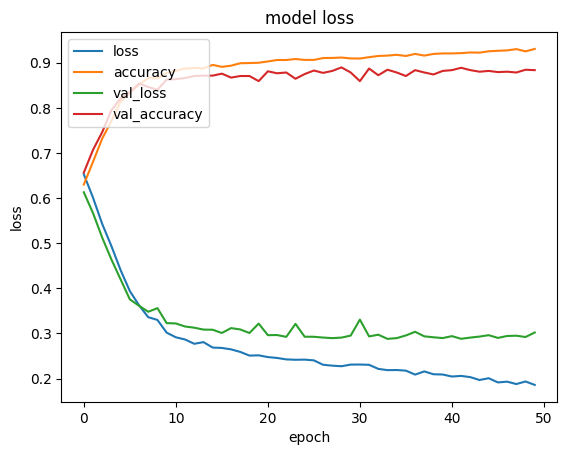

In [18]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_loss'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')
plt.show()

In [19]:
cnnhistory1=cnn.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
  4/144 [..............................] - ETA: 32s - loss: 0.1570 - accuracy: 0.9219

144/144 [==============================] - 37s 260ms/step - loss: 0.1852 - accuracy: 0.9307 - val_loss: 0.2915 - val_accuracy: 0.8826
Epoch 2/50
144/144 [==============================] - 37s 258ms/step - loss: 0.1862 - accuracy: 0.9266 - val_loss: 0.2930 - val_accuracy: 0.8852
Epoch 3/50
144/144 [==============================] - 37s 258ms/step - loss: 0.1808 - accuracy: 0.9337 - val_loss: 0.3016 - val_accuracy: 0.8791
Epoch 4/50
144/144 [==============================] - 37s 257ms/step - loss: 0.1797 - accuracy: 0.9337 - val_loss: 0.3194 - val_accuracy: 0.8800
Epoch 5/50
144/144 [==============================] - 37s 258ms/step - loss: 0.1833 - accuracy: 0.9270 - val_loss: 0.2947 - val_accuracy: 0.8817
Epoch 6/50
144/144 [==============================] - 37s 256ms/step - loss: 0.1745 - accuracy: 0.9370 - val_loss: 0.3150 - val_accuracy: 0.8670
Epoch 7/50
144/144 [==============================] - 37s 256ms/step - loss: 0.1694 - accuracy: 0.9370 - val_loss: 0.2972 - val_accuracy: 0.8

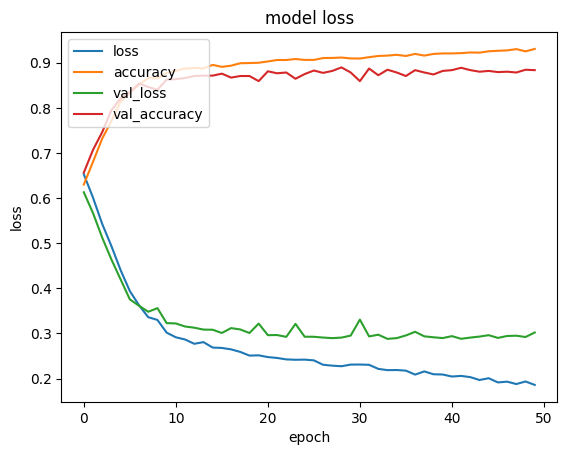

In [20]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_loss'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')
plt.show()

# Saving model

In [21]:
import os
model_name = 'Gender_Detection_Model_v4.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
cnn.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at d:\VoiceClone\GenderDetermination\saved_models\Gender_Detection_Model_v4.h5 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import json
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'cnn' is not defined

In [5]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Gender_Detection_Model_v3.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
# score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


# Predict

In [ ]:
preds = loaded_model.predict(x_testcnn)
preds

37/37 [==============================] - 5s 89ms/step


array([[0.23111318, 0.48943537],
       [0.35660145, 0.3787602 ],
       [0.15293013, 0.593936  ],
       ...,
       [0.25968754, 0.46018735],
       [0.34037578, 0.39100665],
       [0.16697131, 0.571304  ]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)
preds1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
pred_flat = preds1.astype(int).flatten()
predictions = (lb.inverse_transform(pred_flat))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male
1,male
2,male
3,female
4,female
5,male
6,male
7,male
8,male
9,male


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male
1,female
2,male
3,female
4,female
5,male
6,male
7,male
8,male
9,male


In [ ]:
finaldf = actualdf.join(preddf)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(actualdf, preddf)

0.7358490566037735

In [ ]:
val_acc = cnnhistory.history['val_accuracy']

In [ ]:
max(val_acc)

0.7521440982818604